In [1]:
from Source.UCBLearner1 import *
from Source.Auxiliary import *
from tqdm import trange
from Source.Save_Load import *

In [2]:
env1, model = generate_environment()
real_conv_rates = model["real_conversion_rates"]
prices = model["prices"]

T = 120
n_exp = 100
daily_user = 500

In [3]:
optimal_arm = optimization_algorithm(model, False)  # pull the optimal arm
print("Optimal_arm: ", optimal_arm)

optimal_act_rate = mc_simulation(model, real_conv_rates[range(5), optimal_arm], 5, 1000)

optimal_reward = return_reward(model, prices[range(5), optimal_arm],
                               real_conv_rates[range(5), optimal_arm], optimal_act_rate, model['real_alpha_ratio'], model['real_quantity'])
print("Optimal reward: ", optimal_reward)

Optimal_arm:  [2 2 1 1 2]
Optimal reward:  4.44174580973359


In [4]:
learner = UCBLearner1(model)
instant_regret_obs = [[] for _ in range(n_exp)]
instant_reward_obs = [[] for _ in range(n_exp)]

In [5]:
for i in trange(n_exp):

    for t in range(T):
        pulled_arm = learner.act()
        alpha_ratio = env1.alpha_ratio_otd()
        data = env1.round_single_day(daily_user, alpha_ratio, pulled_arm)
        env_data = conv_data(data)
        learner.update(pulled_arm, env_data)

        obs_reward = 0
        if len(data):
            for i_ in range(len(data)):
                obs_reward += np.sum(data[i_][0])

            obs_reward /= len(data)

        instant_regret_obs[i].append(optimal_reward - obs_reward)
        instant_reward_obs[i].append(obs_reward)
    learner.reset()

100%|██████████| 100/100 [59:20<00:00, 35.60s/it]


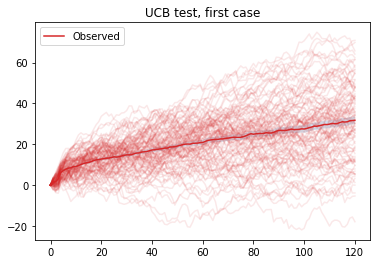

In [6]:
show_results(instant_regret_obs, "UCB test, first case")

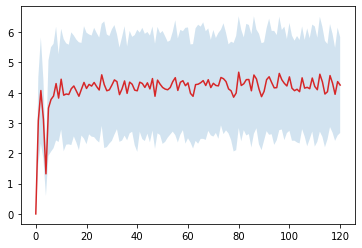

In [7]:
show_reward(instant_reward_obs, "UCB test, first case")

## LOAD DATA

In [8]:
data = MyClass([instant_regret_obs, instant_reward_obs])
save_object(data, "ucb1_data")

In [9]:
data = load_object("ucb1_data")

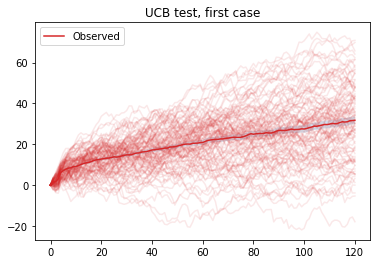

In [10]:
show_results(data.param[0], "UCB test, first case")

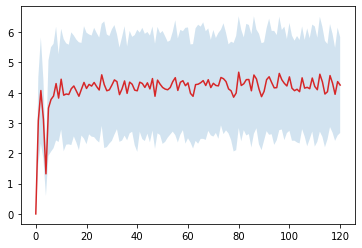

In [11]:
show_reward(data.param[1], "UCB test, first case")